In [1]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------------
file_path = "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Student_Performance_Dataset.csv"

df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (5000, 16)


,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


In [2]:
# Column info
df.info()

# Summary statistics
df.describe(include='all')

# Check missing values
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Final_Percentage            5000 

Student_ID                    0
Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Parental_Education            0
Internet_Access               0
Extracurricular_Activities    0
Math_Score                    0
Science_Score                 0
English_Score                 0
Previous_Year_Score           0
Final_Percentage              0
Performance_Level             0
Pass_Fail                     0
dtype: int64

In [3]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)
df.columns


Index(['student_id', 'age', 'gender', 'class', 'study_hours_per_day',
       'attendance_percentage', 'parental_education', 'internet_access',
       'extracurricular_activities', 'math_score', 'science_score',
       'english_score', 'previous_year_score', 'final_percentage',
       'performance_level', 'pass_fail'],
      dtype='object')

In [4]:
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [5]:
df = df.drop_duplicates()


In [7]:
print(df.columns.tolist())


['student_id', 'age', 'gender', 'class', 'study_hours_per_day', 'attendance_percentage', 'parental_education', 'internet_access', 'extracurricular_activities', 'math_score', 'science_score', 'english_score', 'previous_year_score', 'final_percentage', 'performance_level', 'pass_fail']


In [8]:
# Clean categorical columns safely
categorical_cols = ['gender', 'class', 'parental_education',
                    'internet_access', 'extracurricular_activities',
                    'performance_level', 'pass_fail']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()


In [9]:
df['total_score'] = (
    df['math_score'] +
    df['science_score'] +
    df['english_score']
)

df['average_score'] = df['total_score'] / 3


In [10]:
df['score_improvement'] = df['final_percentage'] - df['previous_year_score']


In [11]:
df['study_efficiency'] = df['average_score'] / df['study_hours_per_day']


In [12]:
df['attendance_level'] = pd.cut(
    df['attendance_percentage'],
    bins=[0, 70, 90, 100],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)


In [13]:
df['has_internet'] = (df['internet_access'] == 'Yes').astype(int)
df['does_extracurricular'] = (df['extracurricular_activities'] == 'Yes').astype(int)
df['is_passing'] = (df['pass_fail'] == 'Pass').astype(int)


In [14]:
output_path = "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/student_performance_clean.csv"
df.to_csv(output_path, index=False)


In [15]:
first_30 = df.head(30)

first_30.to_csv(
    "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/student_performance_first_30.csv",
    index=False
)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [17]:
print("Shape:", df.shape)
df.head(10)


Shape: (5000, 24)


,student_id,age,gender,class,study_hours_per_day,attendance_percentage,parental_education,internet_access,extracurricular_activities,math_score,...,performance_level,pass_fail,total_score,average_score,score_improvement,study_efficiency,attendance_level,has_internet,does_extracurricular,is_passing
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,...,Average,Pass,151,50.333333,-30.67,50.333333,Low,0,0,1
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,...,Average,Pass,159,53.000000,6.00,33.125000,Low,0,1,1
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,...,Good,Pass,215,71.666667,13.67,19.907407,Low,1,1,1
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,...,Average,Pass,193,64.333333,10.33,11.696970,Low,1,0,1
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,...,Poor,Fail,123,41.000000,-27.00,8.200000,Medium,1,0,0
5,S0006,19,Male,12,5.2,82,High School,No,Yes,88,...,Good,Pass,204,68.000000,8.00,13.076923,Medium,0,1,1
6,S0007,16,Male,12,0.8,78,High School,No,No,75,...,Good,Pass,208,69.333333,-14.67,86.666667,Medium,0,0,1
7,S0008,18,Female,11,2.0,81,Graduate,No,Yes,93,...,Average,Pass,178,59.333333,4.33,29.666667,Medium,0,1,1
8,S0009,18,Female,11,3.5,61,Graduate,No,No,55,...,Average,Pass,177,59.000000,-12.00,16.857143,Low,0,0,1
9,S0010,18,Male,10,5.7,97,High School,Yes,No,72,...,Good,Pass,218,72.666667,11.67,12.748538,High,1,0,1


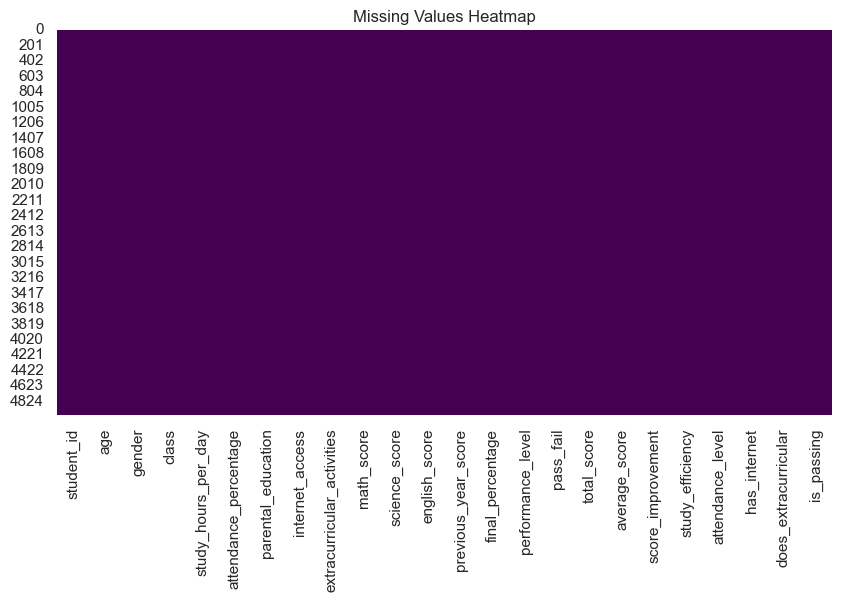

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [19]:
df.describe(include='all')


,student_id,age,gender,class,study_hours_per_day,attendance_percentage,parental_education,internet_access,extracurricular_activities,math_score,...,performance_level,pass_fail,total_score,average_score,score_improvement,study_efficiency,attendance_level,has_internet,does_extracurricular,is_passing
count,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000,5000,5000.000000,...,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
unique,5000,NaN,2,4,NaN,NaN,3,2,2,NaN,...,4,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,S5000,NaN,Female,10,NaN,NaN,Postgraduate,No,Yes,NaN,...,Good,Pass,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN
freq,1,NaN,2553,1301,NaN,NaN,1679,2622,2519,NaN,...,2191,4735,NaN,NaN,NaN,NaN,2072,NaN,NaN,NaN
mean,NaN,16.508800,NaN,NaN,3.287260,74.919800,NaN,NaN,NaN,67.754800,...,NaN,NaN,202.433000,67.477667,0.195456,30.012129,NaN,0.475600,0.503800,0.947000
std,NaN,1.718637,NaN,NaN,1.587979,14.673842,NaN,NaN,NaN,18.724487,...,NaN,NaN,32.892393,10.964131,19.682194,24.934162,NaN,0.499454,0.500036,0.224056
min,NaN,14.000000,NaN,NaN,0.500000,50.000000,NaN,NaN,NaN,35.000000,...,NaN,NaN,109.000000,36.333333,-53.670000,6.722222,NaN,0.000000,0.000000,0.000000
25%,NaN,15.000000,NaN,NaN,1.900000,62.000000,NaN,NaN,NaN,52.000000,...,NaN,NaN,179.000000,59.666667,-14.330000,14.444444,NaN,0.000000,0.000000,1.000000
50%,NaN,17.000000,NaN,NaN,3.300000,75.000000,NaN,NaN,NaN,68.000000,...,NaN,NaN,202.000000,67.333333,0.000000,20.447447,NaN,0.000000,1.000000,1.000000
75%,NaN,18.000000,NaN,NaN,4.700000,88.000000,NaN,NaN,NaN,84.000000,...,NaN,NaN,226.000000,75.333333,15.000000,35.490196,NaN,1.000000,1.000000,1.000000


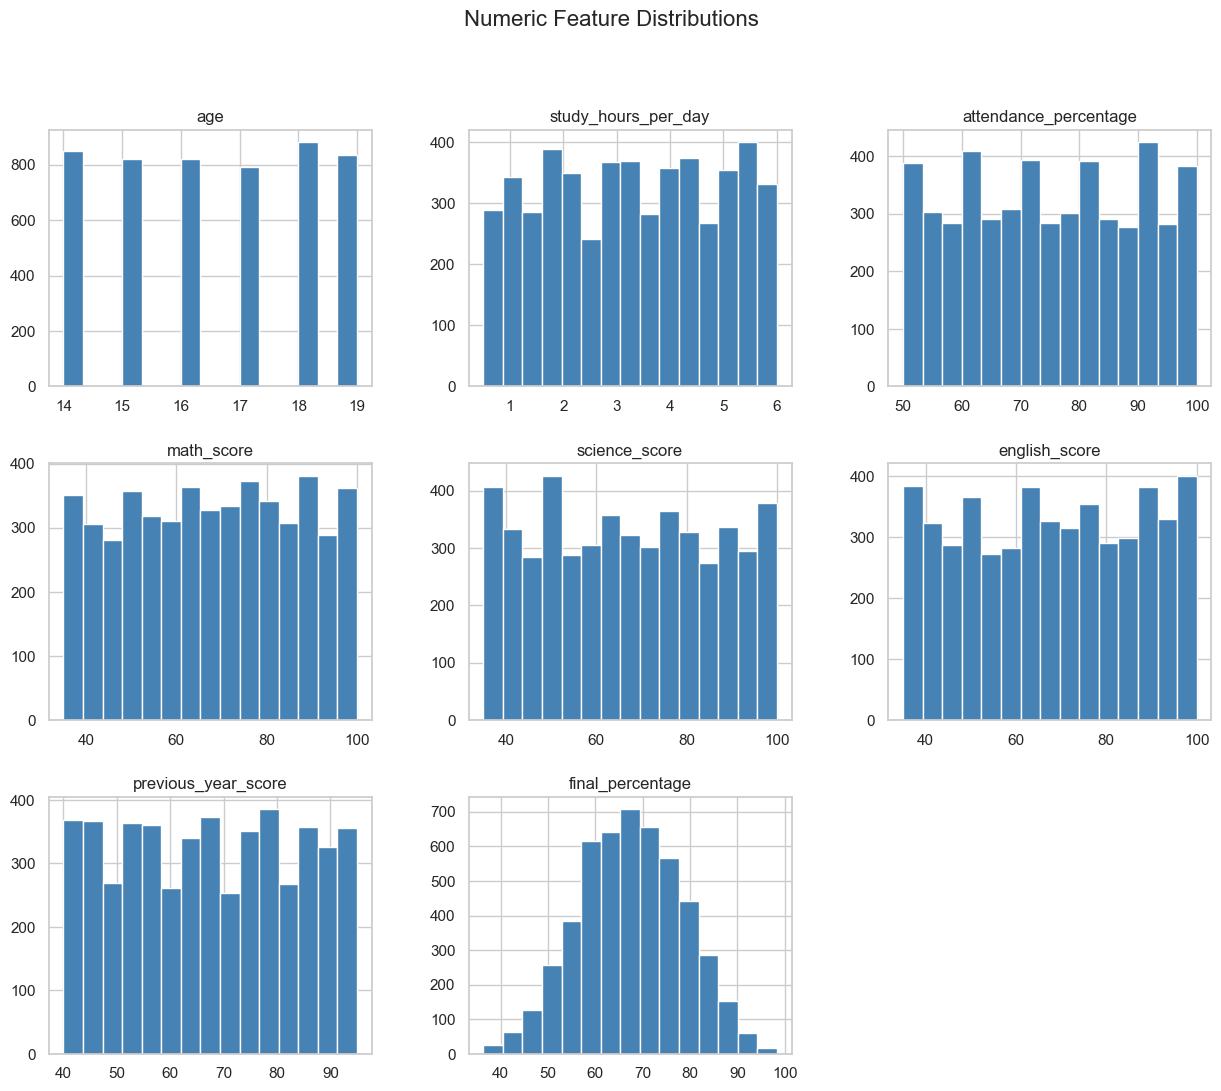

In [20]:
numeric_cols = ['age', 'study_hours_per_day', 'attendance_percentage',
                'math_score', 'science_score', 'english_score',
                'previous_year_score', 'final_percentage']

df[numeric_cols].hist(figsize=(15,12), bins=15, color='steelblue')
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()


C:\Users\eguen\AppData\Local\Temp\ipykernel_17700\4134494036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
C:\Users\eguen\AppData\Local\Temp\ipykernel_17700\4134494036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
C:\Users\eguen\AppData\Local\Temp\ipykernel_17700\4134494036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
C:\Users\eguen\AppData\Local\Temp\ipykernel_17700\4134494036.py:8: FutureWarning: 

Passing `pale

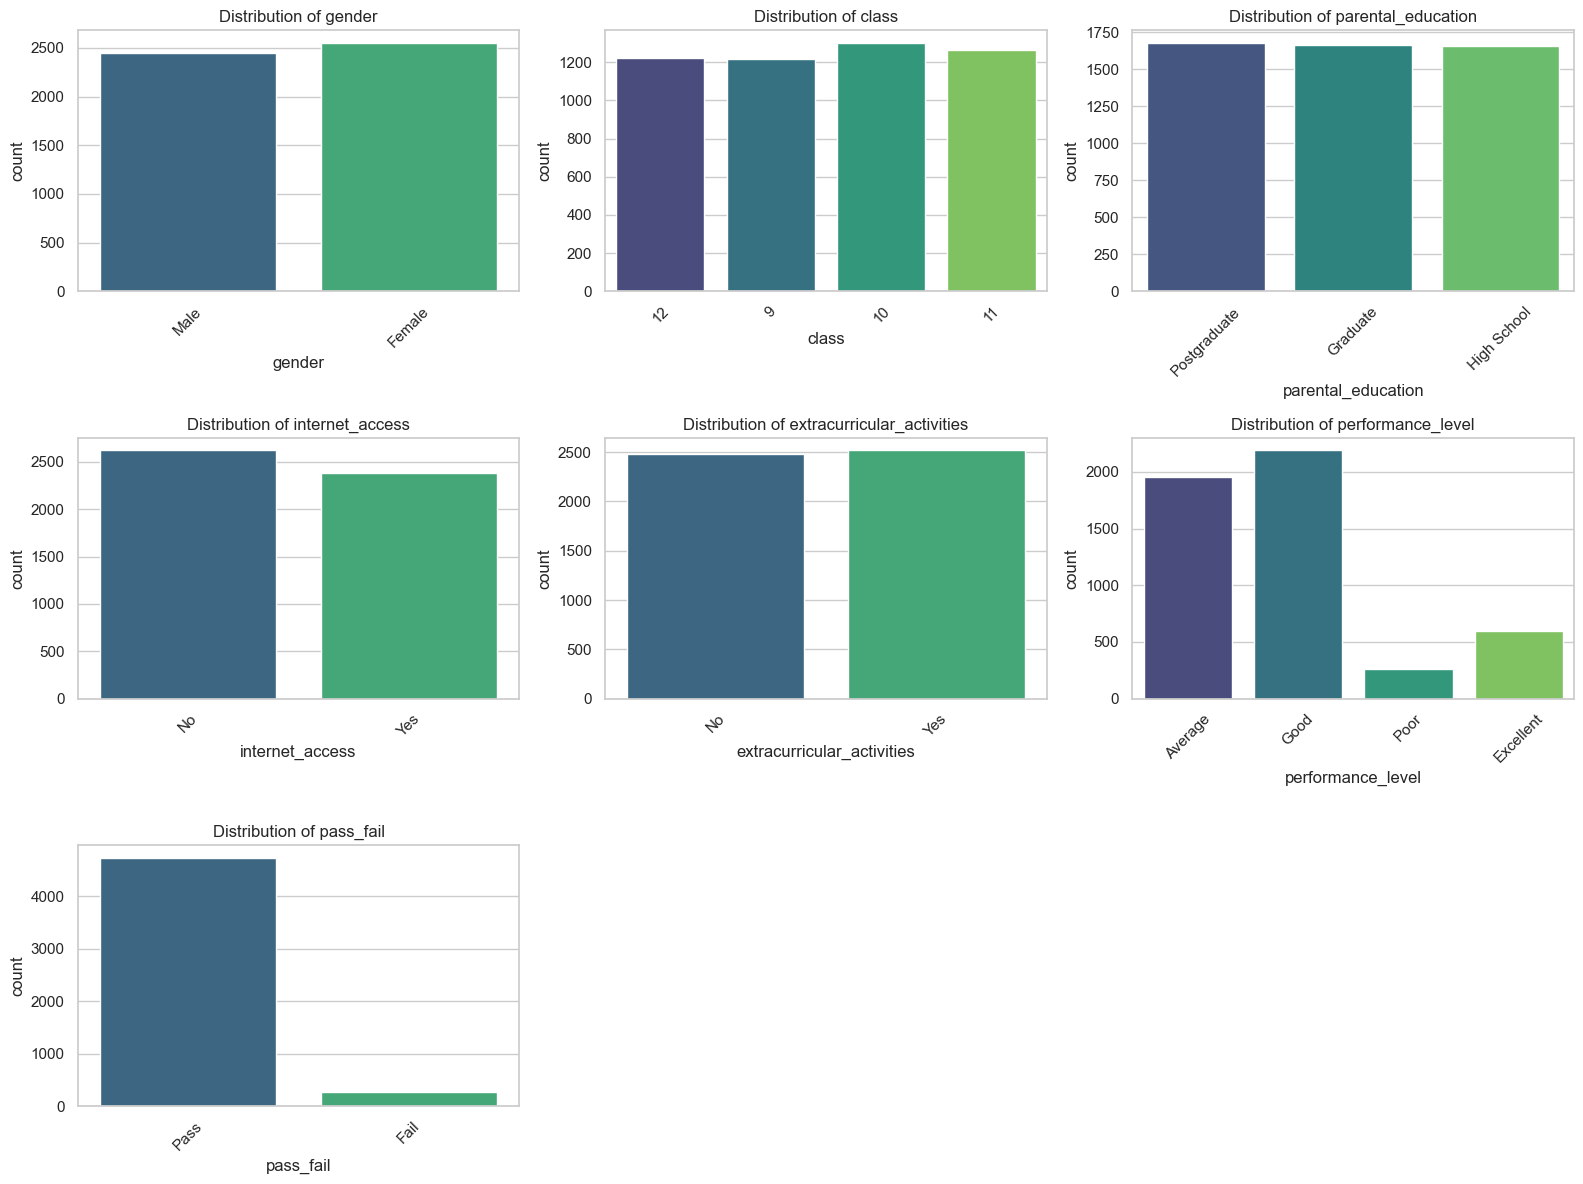

In [21]:
categorical_cols = ['gender', 'class', 'parental_education',
                    'internet_access', 'extracurricular_activities',
                    'performance_level', 'pass_fail']

plt.figure(figsize=(16,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


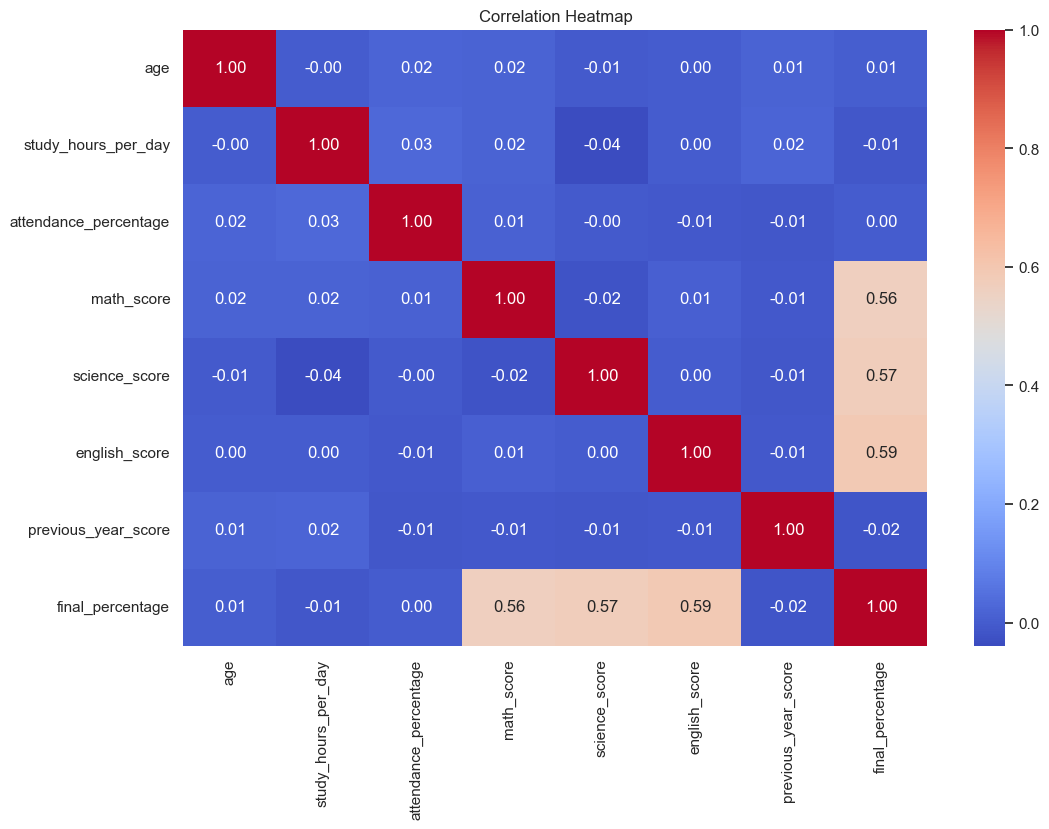

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


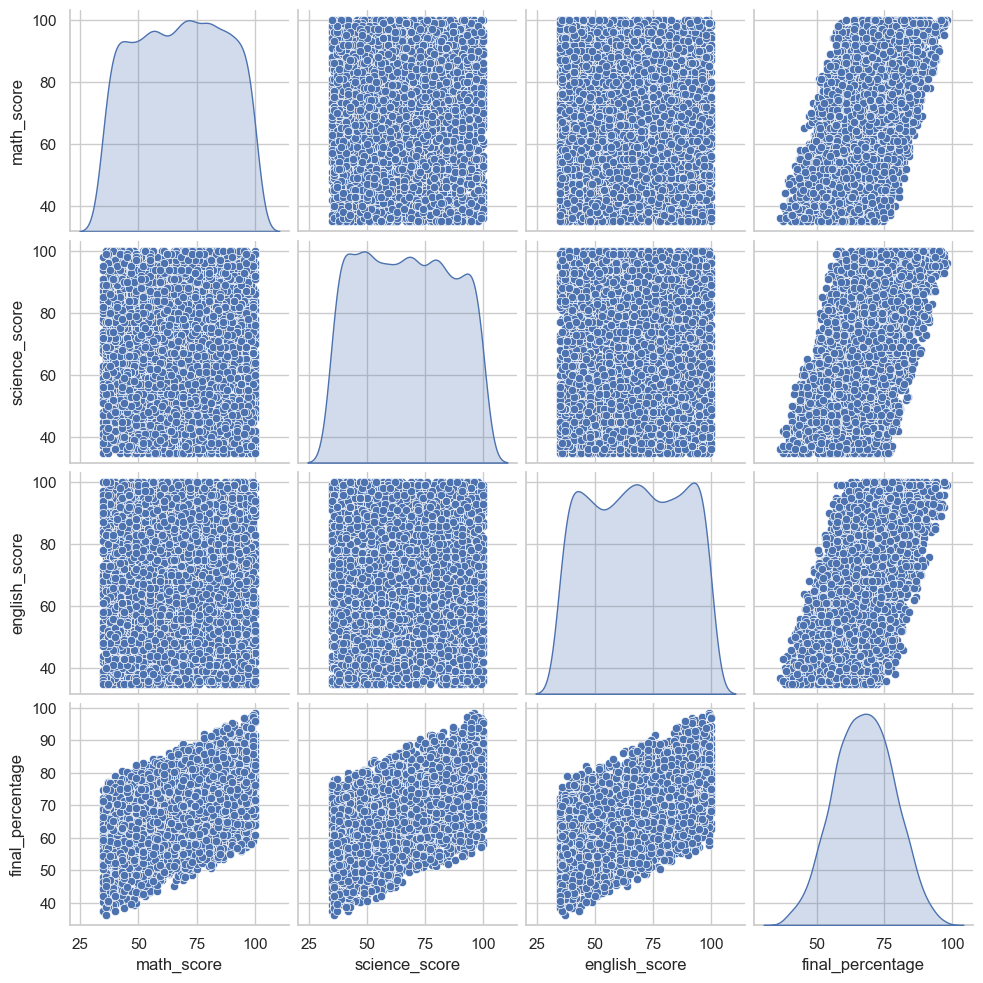

In [23]:
sns.pairplot(df[['math_score', 'science_score', 'english_score', 'final_percentage']],
             diag_kind='kde')
plt.show()


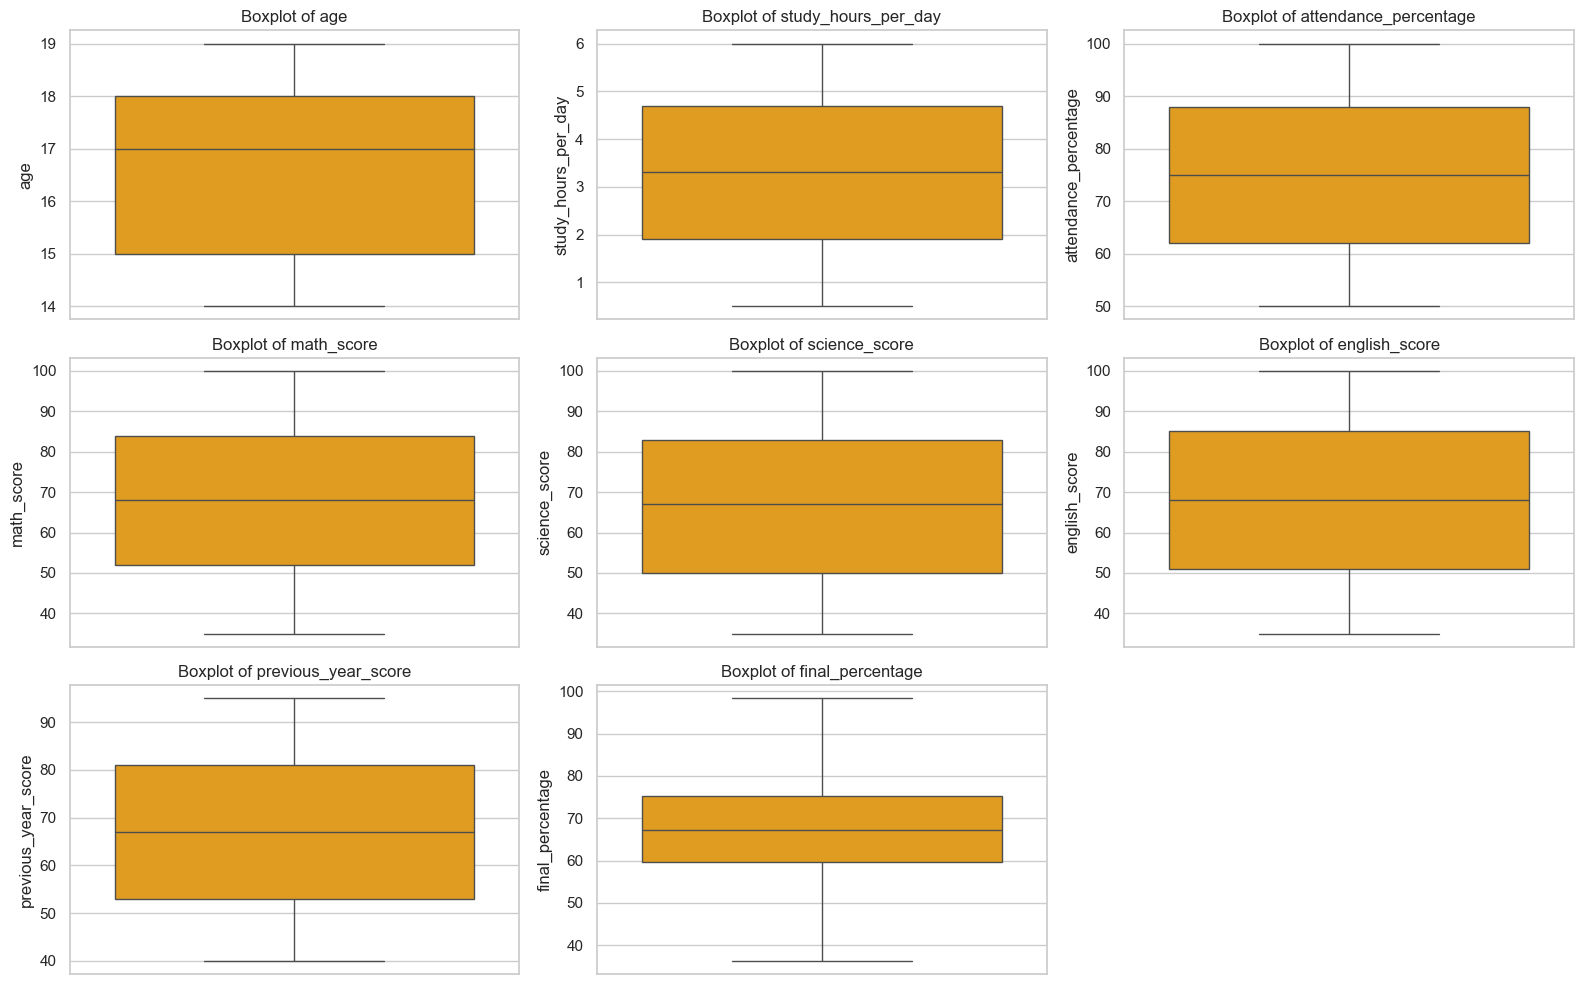

In [24]:
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


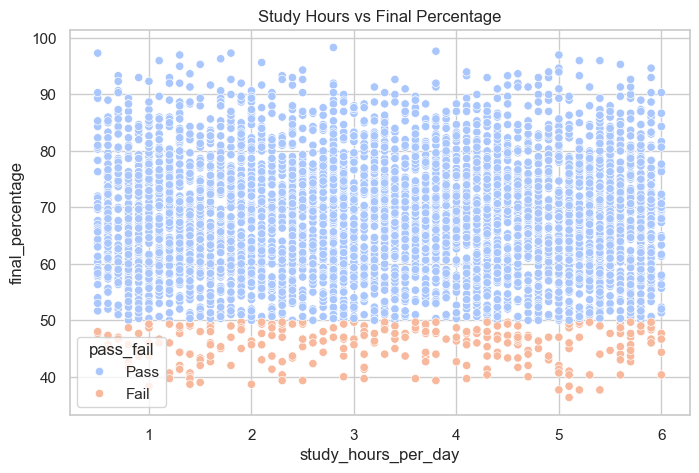

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='study_hours_per_day', y='final_percentage',
                hue='pass_fail', palette='coolwarm')
plt.title("Study Hours vs Final Percentage")
plt.show()


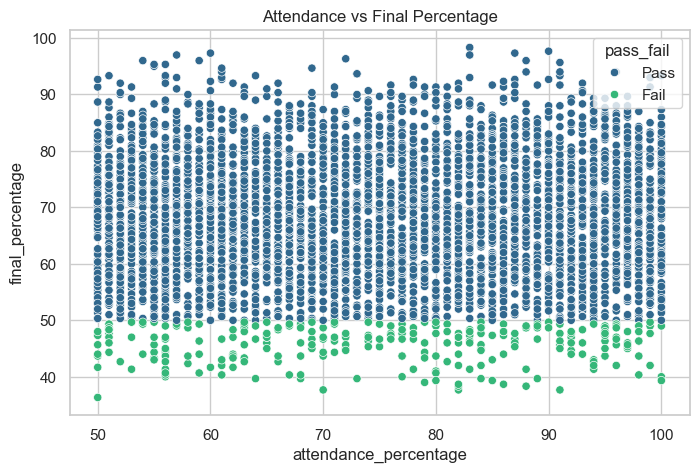

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='attendance_percentage', y='final_percentage',
                hue='pass_fail', palette='viridis')
plt.title("Attendance vs Final Percentage")
plt.show()


C:\Users\eguen\AppData\Local\Temp\ipykernel_17700\3021114894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='final_percentage', palette='magma')


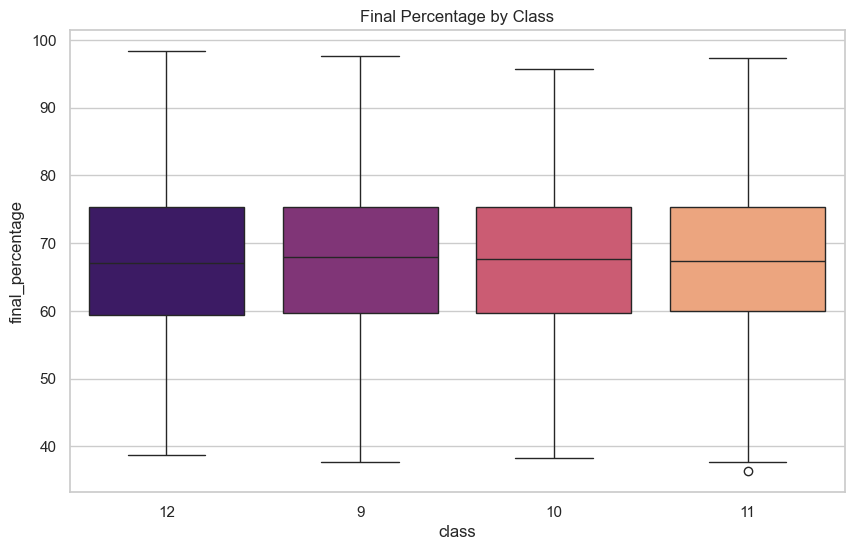

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='class', y='final_percentage', palette='magma')
plt.title("Final Percentage by Class")
plt.show()


In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [29]:
df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/student_performance_clean.csv")


In [30]:
X = df.drop(columns=['pass_fail'])
y = df['pass_fail'].map({'Pass': 1, 'Fail': 0})


In [31]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [32]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [33]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contai

In [36]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       940

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [37]:
# Extract feature names after one-hot encoding
ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_cols)
all_features = np.concatenate([encoded_cols, numeric_cols])

# Extract importances
importances = model.named_steps['clf'].feature_importances_

# Combine into DataFrame
fi = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head(20)


,feature,importance
4026,average_score,0.134103
4025,total_score,0.111449
4024,final_percentage,0.093336
4012,performance_level_Poor,0.086497
4031,is_passing,0.082269
4028,study_efficiency,0.058089
4020,math_score,0.037605
4022,english_score,0.034332
4021,science_score,0.022695
4011,performance_level_Good,0.020491
